In [2171]:
# https://www.kaggle.com/datasets/mascarenhasneil/all-india-pincode-directory-aug21/code?datasetId=1529367&sortBy=dateRun&tab=profile

# Lycan Analytics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import pgeocode
import webbrowser


%matplotlib inline


In [2172]:
df = pd.read_csv('Pincode/pincode.csv', usecols=['StateName','District','Pincode','Latitude','Longitude'])
df.head()

/var/folders/7l/xnly7sjn0x3cmznv41sljv940000gn/T/ipykernel_9035/3965640415.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Pincode/pincode.csv', usecols=['StateName','District','Pincode','Latitude','Longitude'])


,Pincode,District,StateName,Latitude,Longitude
0,515631,ANANTAPUR,ANDHRA PRADESH,14.5689,77.85624
1,515631,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857014
2,515631,ANANTAPUR,ANDHRA PRADESH,14.561111,77.85715
3,515581,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588
4,515581,ANANTAPUR,ANDHRA PRADESH,14.24555,78.2477


In [2173]:
df.shape

(157126, 5)

In [2174]:
df.info()
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157126 entries, 0 to 157125
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Pincode    157126 non-null  int64 
 1   District   157126 non-null  object
 2   StateName  157126 non-null  object
 3   Latitude   148288 non-null  object
 4   Longitude  148283 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.0+ MB
Pincode       int64
District     object
StateName    object
Latitude     object
Longitude    object
dtype: object


longitude ,Latitude = blanks, 0 , NA
feature engineering -  replacing all unwanted values with 0

In [2175]:
df['Latitude'] = df['Latitude'].astype('str')
df['Longitude'] = df['Longitude'].astype('str')

In [2176]:
df2 = df[['Latitude','Longitude']].apply(lambda x: x.str.strip()).replace('', np.nan)
df3 = df2[['Latitude','Longitude']].apply(lambda x: x.str.strip()).replace('NA', np.nan)

# We can then use the to_numeric approach in order to convert the values under the ‘'Latitude','Longitude' column into floats
# By setting errors=’coerce’, we’ll transform the non-numeric values into NaN.
df3['Latitude'] = pd.to_numeric(df3['Latitude'], errors='coerce')
df3['Longitude'] = pd.to_numeric(df3['Longitude'], errors='coerce')
# https://datatofish.com/convert-string-to-float-dataframe/

df3 = df3[['Latitude','Longitude']].replace(np.nan,0,regex=True) # https://sparkbyexamples.com/pandas/pandas-replace-blank-values-with-nan/
df3['Latitude'] = df3['Latitude'].astype(str)
df3['Longitude'] = df3['Longitude'].astype(str)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157126 entries, 0 to 157125
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Latitude   157126 non-null  object
 1   Longitude  157126 non-null  object
dtypes: object(2)
memory usage: 2.4+ MB


In [2177]:
df3.Latitude.isnull().values.any()

False

In [2178]:
df3

,Latitude,Longitude
0,14.5689,77.85624
1,14.5281,77.857014
2,14.561111,77.85715
3,14.2488,78.2588
4,14.24555,78.2477
...,...,...
157121,28.98,77.68
157122,28.9724,77.67536
157123,28.99,77.71
157124,11.24529,75.778455


In [2179]:
# exporting csv file for df3 to check all blanks, NA with 0
#df3.to_csv('lat_long.csv', encoding='utf-8',index=True)

In [2180]:
df.drop(df.iloc[:, 3:], inplace=True, axis=1)
df

,Pincode,District,StateName
0,515631,ANANTAPUR,ANDHRA PRADESH
1,515631,ANANTAPUR,ANDHRA PRADESH
2,515631,ANANTAPUR,ANDHRA PRADESH
3,515581,ANANTAPUR,ANDHRA PRADESH
4,515581,ANANTAPUR,ANDHRA PRADESH
...,...,...,...
157121,250002,MEERUT,UTTAR PRADESH
157122,250002,MEERUT,UTTAR PRADESH
157123,250001,MEERUT,UTTAR PRADESH
157124,673611,KOZHIKODE,KERALA


In [2181]:
# frames = [df, df3]
# https://sparkbyexamples.com/pandas/pandas-merge-two-dataframes-by-index/ 
# join two DataFrames with concat
df2 = pd.concat([df, df3], axis=1)
print(df2)

        Pincode   District       StateName   Latitude  Longitude
0        515631  ANANTAPUR  ANDHRA PRADESH    14.5689   77.85624
1        515631  ANANTAPUR  ANDHRA PRADESH    14.5281  77.857014
2        515631  ANANTAPUR  ANDHRA PRADESH  14.561111   77.85715
3        515581  ANANTAPUR  ANDHRA PRADESH    14.2488    78.2588
4        515581  ANANTAPUR  ANDHRA PRADESH   14.24555    78.2477
...         ...        ...             ...        ...        ...
157121   250002     MEERUT   UTTAR PRADESH      28.98      77.68
157122   250002     MEERUT   UTTAR PRADESH    28.9724   77.67536
157123   250001     MEERUT   UTTAR PRADESH      28.99      77.71
157124   673611  KOZHIKODE          KERALA   11.24529  75.778455
157125   673572  KOZHIKODE          KERALA      11.35      75.91

[157126 rows x 5 columns]


In [2182]:
df2['Pincode'].nunique()

19300

In [2183]:
'''
df['Pincode'].value_counts() # here we can see that in the original data there are multiple duplicate pincodes we will keep
# the first one and drop the remaining.
'''

"\ndf['Pincode'].value_counts() # here we can see that in the original data there are multiple duplicate pincodes we will keep\n# the first one and drop the remaining.\n"

In [2184]:
df2['Pincode'].value_counts()
# here we can see that in the original data there are multiple duplicate pincodes we will keep
# the first one and drop the remaining.

494001    73
494442    72
494441    69
494226    69
491441    67
          ..
411031     1
411035     1
826010     1
828123     1
673006     1
Name: Pincode, Length: 19300, dtype: int64

### Plotting the Locations of your pincode on India Map, taking user input

In [2185]:
# https://pgeocode.readthedocs.io/en/latest/overview.html
# https://www.tutorialspoint.com/how-to-get-the-longitude-and-latitude-of-a-city-using-python
def pinGeoLocator(pincode):
    nomi = pgeocode.Nominatim('in')
    pincodeGeolocator = nomi.query_postal_code(pincode)
    return float(pincodeGeolocator.latitude), float(pincodeGeolocator.longitude)


'''
def showOnMap(df_new):
    my_map = folium.Map(location=[df_new.Latitude.to_string(index=False),df_new.Longitude.to_string(index=False)], zoom_start = 8, min_zoom = 2)
    print(df_new.District.to_string(index=False), df_new.StateName.to_string(index=False))
    print(df_new.iloc[0, 3:])
    folium.Marker(location=df_new.iloc[0, 3:],popup=f'{df_new.iloc[0, 1]},{df_new.iloc[0, 2]}',icon=folium.Icon(color="red")).add_to(my_map)
    folium.Circle(radius=100,location=df_new.iloc[0, 3:],popup=f'{df_new.iloc[0, 1]},{df_new.iloc[0, 2]}',color="blue",fill=False,).add_to(my_map)
    #Display the map
    my_map.save("map.html")
    webbrowser.open("map.html")
'''

def showOnMap(df_new):
    my_map = folium.Map(location=[df_new.loc[0, 'Latitude'],df_new.loc[0,'Longitude']], zoom_start = 8, min_zoom = 2)
    for i in range(len(df_new)):
    #folium.Marker(location=df2.iloc[i, 1:3],popup=f'{df2.iloc[i, 0]}',icon=folium.Icon(color="green")).add_to(my_map)
    #folium.Circle(radius=100,location=df2.iloc[i, 1:3],popup=f'{df2.iloc[i, 0]}',color="yellow",fill=False,).add_to(my_map)
        
        #print(df_new.District.to_string(index=False), df_new.StateName.to_string(index=False))
        #print(df_new.iloc[i, 3:])
        folium.Marker(location=df_new.iloc[i, 3:],popup=f'{df_new.iloc[i, 1]},{df_new.iloc[i, 2]},{df_new.iloc[i, 3:]}',icon=folium.Icon(color="red")).add_to(my_map)
        folium.Circle(radius=100,location=df_new.iloc[i, 3:],popup=f'{df_new.iloc[i, 1]},{df_new.iloc[i, 2]}',color="blue",fill=False,).add_to(my_map)
    #Display the map
    my_map.save("map.html")
    webbrowser.open("map.html")
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html > Indexing both axes
# folium - doc > https://python-visualization.github.io/folium/quickstart.html

In [2186]:
pincode = int(input("Enter Pincode of your place"))
# print(type(pincode))

if len(str(pincode)) == 6:
    if pincode in set(df2['Pincode']):
        df_new = df2.loc[df2['Pincode'] == pincode] # https://www.geeksforgeeks.org/how-to-select-rows-from-a-dataframe-based-on-column-values/
        # Reset the index to a single-level index starting from 0
        df_new = df_new.reset_index(drop=True)
        print(df_new)
        print(len(df_new.axes[0]))
        for i in range(len(df_new.axes[0])):
            lat_val = df_new.iloc[i]['Latitude']
            long_val  = df_new.iloc[i]['Longitude']
            
            if float(lat_val)*float(long_val) == 0.0:
                #print(df_new.iloc[i])
                print("Lat Long values are missing in the current dataset, fetching from API...")
                print("____________________START____________________________")
                
                # check if the latitude and longitude data from df_new is 0, then call pgeocode API to fetch the geocoordinates of those pincodes
                df_new.loc[i, 'Latitude'], df_new.loc[i,'Longitude'] = pinGeoLocator(pincode)
                #df_new.drop_duplicates(subset = ['Latitude', 'Longitude'],keep = 'first', inplace = True)
                #df_new.reset_index(drop=True,inplace=True)
                
            
            #else:
                #print("No Missing Lat Long Data")
        df_new.drop_duplicates(subset = ['Latitude', 'Longitude'],keep = 'first', inplace = True)
        df_new.reset_index(drop=True,inplace=True)
        print(df_new)
        showOnMap(df_new)
    else:
        print("Pincode do not exist :(")
    # 421301, 411057, 577528, 828121, 833201, 532440(lat long values are interchanged)
else:
    print("Please input 6 digit pincode")




    Pincode    District       StateName  Latitude   Longitude
0    532440  SRIKAKULAM  ANDHRA PRADESH   83.7434     18.5618
1    532440  SRIKAKULAM  ANDHRA PRADESH   83.7228     18.5968
2    532440  SRIKAKULAM  ANDHRA PRADESH   83.7057     18.6339
3    532440  SRIKAKULAM  ANDHRA PRADESH   83.7654     18.6303
4    532440  SRIKAKULAM  ANDHRA PRADESH   83.7619     18.5294
5    532440  SRIKAKULAM  ANDHRA PRADESH   83.7714      18.591
6    532440  SRIKAKULAM  ANDHRA PRADESH   83.7691      18.565
7    532440  SRIKAKULAM  ANDHRA PRADESH   83.7228     18.5968
8    532440  SRIKAKULAM  ANDHRA PRADESH   83.7263     18.5727
9    532440  SRIKAKULAM  ANDHRA PRADESH   83.7264     18.5728
10   532440  SRIKAKULAM  ANDHRA PRADESH   83.7756     18.5423
11   532440  SRIKAKULAM  ANDHRA PRADESH   83.7715     18.5911
12   532440  SRIKAKULAM  ANDHRA PRADESH   83.7233     18.6217
13   532440  SRIKAKULAM  ANDHRA PRADESH   83.7315     18.6318
14   532440  SRIKAKULAM  ANDHRA PRADESH       0.0     18.5472
15   532

In [2187]:
# we will be dropping duplicate pincodes and associated rows.

# Delete duplicate rows based on specific columns 
df3 = df2.drop_duplicates(subset=['Pincode'],keep='first')
print(df3)

        Pincode           District         StateName    Latitude   Longitude
0        515631          ANANTAPUR    ANDHRA PRADESH     14.5689    77.85624
3        515581          ANANTAPUR    ANDHRA PRADESH     14.2488     78.2588
7        515571          ANANTAPUR    ANDHRA PRADESH  13.9226755  78.2011756
17       515311          ANANTAPUR    ANDHRA PRADESH   13.805102   77.043902
20       515281          ANANTAPUR    ANDHRA PRADESH   14.128106   76.980106
...         ...                ...               ...         ...         ...
157066   713217  PASCHIM BARDHAMAN       WEST BENGAL   23.572935    87.23322
157070   713384  PASCHIM BARDHAMAN       WEST BENGAL   23.648181   87.160475
157080   171218             SHIMLA  HIMACHAL PRADESH  31.0238333  77.1908333
157086   171010             SHIMLA  HIMACHAL PRADESH  31.0765556  77.1394167
157096   673006          KOZHIKODE            KERALA       11.36       75.82

[19300 rows x 5 columns]


In [2188]:
df3[df3['Pincode']==828121] # no duplicates :-)


,Pincode,District,StateName,Latitude,Longitude
21241,828121,DHANBAD,JHARKHAND,23.636905,86.174699


In [2189]:
print(df3.Pincode.dtype)
# changing int64 to python native int
df3['Pincode'] = df3['Pincode'].astype(int)

print(df3.Pincode.dtype)

int64
int64


/var/folders/7l/xnly7sjn0x3cmznv41sljv940000gn/T/ipykernel_9035/2928074997.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Pincode'] = df3['Pincode'].astype(int)


In [2190]:
df_PinStateDist = df3
df_PinStateDist.drop(['Latitude', 'Longitude'], axis=1, inplace=True)
df_PinStateDist
df_PinStateDist.to_csv('PinStateDist.csv', encoding='utf-8',index=False)

/var/folders/7l/xnly7sjn0x3cmznv41sljv940000gn/T/ipykernel_9035/3090434117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PinStateDist.drop(['Latitude', 'Longitude'], axis=1, inplace=True)


Performing EDA -

In [2191]:
df_statePin = df3.groupby(['StateName'])['Pincode'].count().reset_index(name='Pincode').sort_values(['Pincode'], ascending=False)
# https://www.geeksforgeeks.org/how-to-extract-the-value-names-and-counts-from-value_counts-in-pandas/

df_statePin = df_statePin.reset_index(drop=True)
df_statePin.rename(columns = {'Pincode':'Pincode_frequency'}, inplace = True)
print(df_statePin)

# changed the index to StateName
# https://pynative.com/pandas-set-index/

df_statePin.set_index(['StateName'],inplace=True,verify_integrity=False)
df_statePin.head()

                                       StateName  Pincode_frequency
0                                     TAMIL NADU               2036
1                                  UTTAR PRADESH               1652
2                                    MAHARASHTRA               1585
3                                         KERALA               1425
4                                      KARNATAKA               1347
5                                 ANDHRA PRADESH               1228
6                                    WEST BENGAL               1128
7                                        GUJARAT               1007
8                                      RAJASTHAN               1004
9                                         ODISHA                935
10                                         BIHAR                857
11                                MADHYA PRADESH                770
12                                     TELANGANA                674
13                                         ASSAM

,Pincode_frequency
StateName,
TAMIL NADU,2036
UTTAR PRADESH,1652
MAHARASHTRA,1585
KERALA,1425
KARNATAKA,1347


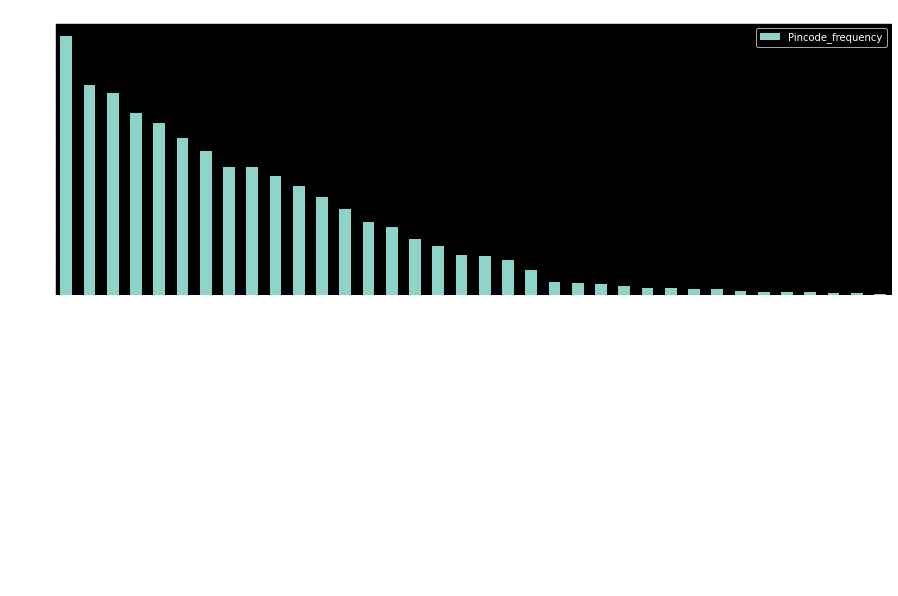

In [2192]:
# https://www.geeksforgeeks.org/how-to-extract-the-value-names-and-counts-from-value_counts-in-pandas/

df_statePin.plot(kind='bar',figsize=(15,5))
plt.ylabel("Pincode_frequency")
plt.xlabel("StateName")
plt.title("Bar Graph showing Descending frequency of pincodes per state")
plt.show()

In [2193]:
df_stateDist = df3.groupby(['StateName'])['District'].count().reset_index(name='District').sort_values(['District'], ascending=False)
# https://www.geeksforgeeks.org/how-to-extract-the-value-names-and-counts-from-value_counts-in-pandas/

df_stateDist = df_stateDist.reset_index(drop=True)
df_stateDist.rename(columns = {'District':'District_frequency'}, inplace = True)
print(df_stateDist)

# changed the index to StateName
# https://pynative.com/pandas-set-index/

df_stateDist.set_index(['StateName'],inplace=True,verify_integrity=False)
df_stateDist.head()

                                       StateName  District_frequency
0                                     TAMIL NADU                2036
1                                  UTTAR PRADESH                1652
2                                    MAHARASHTRA                1585
3                                         KERALA                1425
4                                      KARNATAKA                1347
5                                 ANDHRA PRADESH                1228
6                                    WEST BENGAL                1128
7                                        GUJARAT                1007
8                                      RAJASTHAN                1004
9                                         ODISHA                 935
10                                         BIHAR                 857
11                                MADHYA PRADESH                 770
12                                     TELANGANA                 674
13                                

,District_frequency
StateName,
TAMIL NADU,2036
UTTAR PRADESH,1652
MAHARASHTRA,1585
KERALA,1425
KARNATAKA,1347


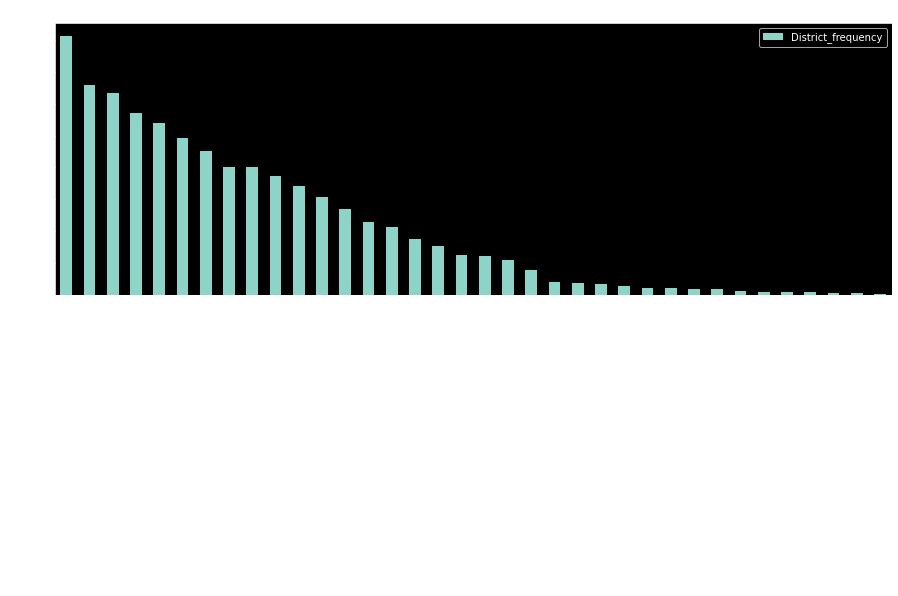

In [2194]:
df_stateDist.plot(kind='bar',figsize=(15,5))
plt.ylabel("District_frequency")
plt.xlabel("StateName")
plt.title("Bar Graph showing Descending frequency of pincodes per state")
plt.show()

In [2195]:
y = list(df3.groupby(['StateName'])['Pincode'].count())
y

[22,
 1228,
 49,
 572,
 857,
 25,
 274,
 97,
 88,
 1007,
 315,
 436,
 196,
 380,
 1347,
 1425,
 16,
 9,
 770,
 1585,
 52,
 68,
 47,
 43,
 935,
 22,
 534,
 1004,
 19,
 2036,
 674,
 8,
 80,
 1652,
 300,
 1128]

In [2196]:
x = list(df3.groupby(['StateName'])
x

SyntaxError: invalid syntax (1862238462.py, line 2)

In [ ]:
# Visualising the number of unique pincodes in a state - Histogram

hist = df_statePin.hist(bins=10)


In [ ]:
bihar_df

Pushing Code to Git -
https://komodor.com/blog/solving-fatal-not-a-git-repository-error/
1. follow the steps mentioned in order from point 1
git init > git status > git add . > git commit -m "blabla" > git remote add origin <repo link> > git branch -M main > git push -u origin main